<h1 style="text-align: center;">Filter Design</h1>
<p style="text-align: center;">Lab 12 - Final Project</p>
<p style="text-align: center;">Spring 2024</p>

### 1. Purpose 
Apply the skills and concepts from the course into a practical application.

### 2. Deliverables Overview 
The deliverables for this project are described in each task. In general, they are more open-ended than in previous labs. Use the tools you have acquired throughout the semester to complete each task, while thoroughly demonstrating the satisfaction of the given design specifications.  

### 3. Background
Suppose you are working for an aircraft company on a positioning control system that controls the position of the landing gear for their aircraft. This positioning system requires a feedback signal from a position sensor. However, noise on the sensor signal is producing inaccurate position readings that degrade the performance of the positioning system.  

From the position sensor data sheet, you know the position measurement information is contained within an AC voltage waveform in the range of $1.8 kHz \le f \le 2.0 kHz$. You know that the positioning system shares a ground connection with a switching amplifier, and that you should expect significant noise at higher frequencies. Since this is a high accuracy positioning system, you also know that unwanted low frequency vibrations from the building's ventilation system are perturbing the sensor measurement in an undesirable way. In addition, you realize there may be other, smaller, unaccountable sources of noise. Your boss provides you with an oscilloscope capture of the following signal:

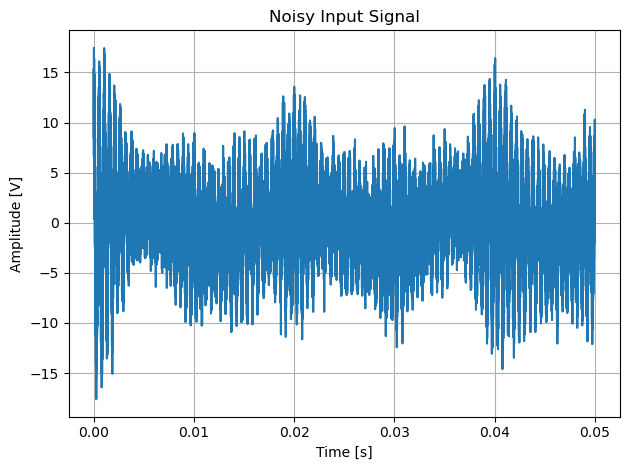

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# load input signal
df = pd.read_csv("NoisySignal.csv")

t = df["0"].values
sensor_sig = df["1"].values

plt.figure()
plt.plot(t,sensor_sig)
plt.grid()
plt.title("Noisy Input Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [V]")
plt.tight_layout()
plt.show()

Since this signal is more complex than we are used to working with and the sampling frequency will need to be very high, I have included a workaround for **matplotlib.pyplot.stem()** along with several examples of how to use it. Use this function in place of **matplotlib.pyplot.stem()**. **matplotlib.pyplot.stem()** will take a long time to run, so this function is provided to speed up stem plotting.

In [2]:
def make_stem(ax, x, y, color="k", style="solid", label="", linewidths=2.5, **kwargs):
    """
    Workaround for matplotlib.pyplot.stem()
    
    inputs: ax - axis to be plotted
            x - x axis values to plot
            y - y axis values to plot
            style - style of line to be plotted (default: solid)
            label - label for plot legend (default: none)
            linewidths - line width of line to be plotted
    """
    ax.axhline(x[0], x[-1], 0, color="r")
    ax.vlines(x, 0, y, color=color, linestyles=style, label=label, linewidths=linewidths)
    ax.set_ylim([1.05*y.min(), 1.05*y.max()])

To use **make_stem()** as a single plot:

NameError: name 'x' is not defined

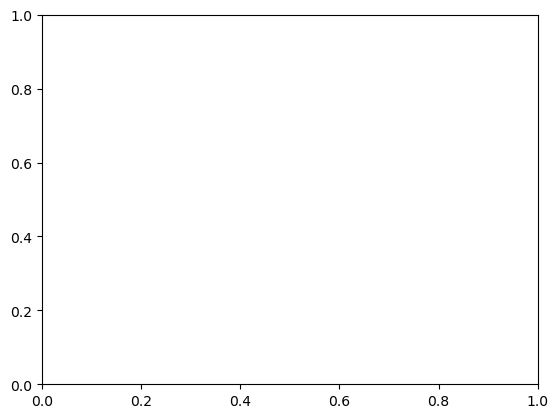

In [3]:
""" This code is non-working, it simply shows how to use the make_stem() function """
fig, ax = plt.subplots()
make_stem(ax, x, y)
plt.tight_layout()
plt.show()

To use **make_stem()** as a single plot with multiple traces:

In [ ]:
""" This code is non-working, it simply shows how to use the make_stem() function """
fig, ax = plt.subplots()
make_stem(ax, x1, y1)
make_stem(ax, x2, y2)
plt.tight_layout()
plt.show()

To use **make_stem()** to plot multiple subplots:

In [ ]:
""" This code is non-working, it simply shows how to use the make_stem() function """
fig, (ax1, ax2) = plt.subplots(2, 1, )
plt.subplot(ax1)
make_stem(ax1, x1, y1)
plt.subplot(ax2)
make_stem(ax2, x2, y2)
plt.tight_layout()
plt.show()

For each of the above examples, we are able to format plots as usual, using the **plt.___** commands. For the situation with subplots, including the line **plt.subplot(ax_)** allows us to format each subplot as usual. Otherwise, commands in the **ax.___** would have to be used.

### 4. Tasks
1. Identify the noise magnitudes and corresponding frequencies due to the low frequency vibration and switching amplifier. This information will help characterize the main noise sources. Also, identify the magnitudes and corresponding frequencies of the position measurement information. 

In [1]:
# Insert all necessary imports here
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy
import control as con

In [3]:
# Insert all necessary functions from previous labs here
def FastFourierTransform(x, fs):
    '''
    (lab 9)
    This function performs a Fast Fourier Transform on the given signal (x).
    Given the signal and sampling frequency, the function will return the computed frequencies, magnitude, and phase
    for the given signal.
    INPUTS:
        x - desired signal to go through transform
        fs - desired sampling frequency
    OUTPUTS: **RETURNS IN THIS ORDER**
        freq - computed frequencies given fs
        mag - computed magnitude of the signal
        phi - computed phase of the signal
    '''
    N = len(x) #find length of signal
    xFFT = scipy.fftpack.fft(x) #perform fft
    xFFTShift = scipy.fftpack.fftshift(xFFT) #shift zero frequency components to center of spectrum
    freq = np.arange(-N/2, N/2) * fs / N #compute frequencies for output signal
    mag = np.abs(xFFTShift) / N #compute mags
    phi = np.angle(xFFTShift) #compute phase
    return freq, mag, phi

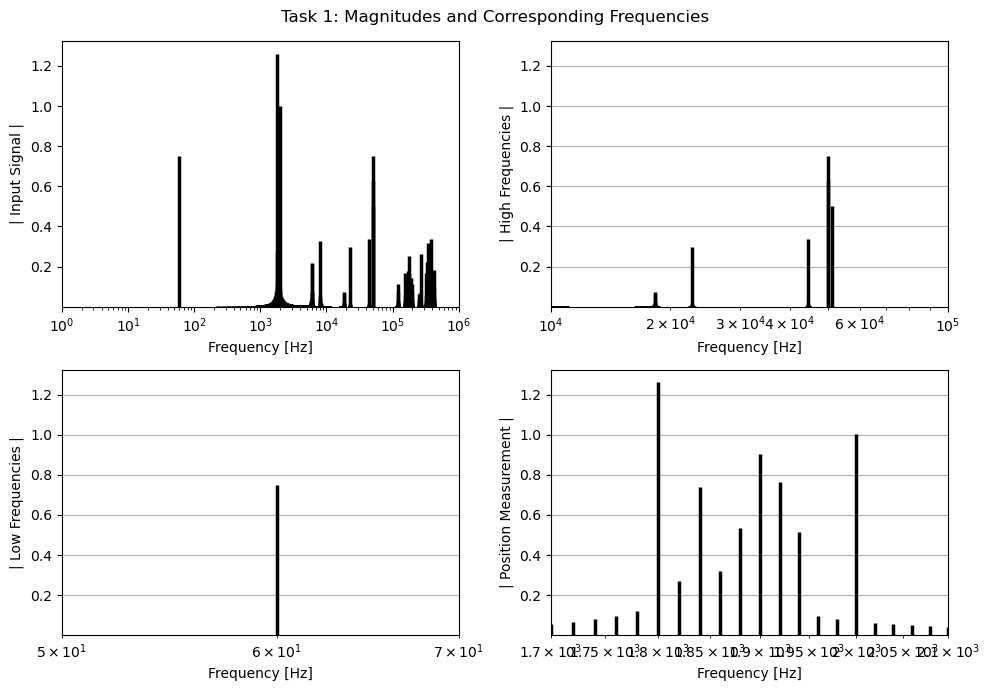

In [17]:
# Insert code for Task 1 here 
# There should be 4 plots in this task

# load input signal
df = pd.read_csv("NoisySignal.csv")

t = df["0"].values
sensor_sig = df["1"].values
steps = 1e-6
sampleFreq = 1 / steps

#FFT
freq, mag, phi = FastFourierTransform(sensor_sig, sampleFreq)

#plotting
plt.figure(tight_layout=True, figsize=(10, 7))
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

#plot into subplot
make_stem(ax1, freq, mag)
ax1.set_xlabel("Frequency [Hz]")
ax1.set_xlim([1, 1e6])
ax1.set_xscale("log")
ax1.set_ylabel("| Input Signal |")
# ax1.grid()

make_stem(ax2, freq, mag)
ax2.set_xlabel("Frequency [Hz]")
ax2.set_xlim([1e4, 1e5])
ax2.set_xscale("log")
ax2.set_ylabel("| High Frequencies |")
ax2.grid()

make_stem(ax3, freq, mag)
ax3.set_xlabel("Frequency [Hz]")
ax3.set_xlim([50,70])
ax3.set_xscale("log")
ax3.set_ylabel("| Low Frequencies |")
ax3.grid()

make_stem(ax4, freq, mag)
ax4.set_xlabel("Frequency [Hz]")
ax4.set_xlim([1.7e3, 2.1e3])
ax4.set_xscale("log")
ax4.set_ylabel("| Position Measurement |")
ax4.grid()

plt.suptitle("Task 1: Magnitudes and Corresponding Frequencies")
plt.show()

2. Design an analog filter circuit to remove the noise and only pass the position measurement information. Type out the filter transfer function and insert a professional image of the circuit schematic. List the values of the passive components. Label the input and output of the circuit so the technician can wire your circuit up correctly. The filter must meet the following specifications:
 - The position measurement information is attenuated by less than -0.3 dB.  
 - The low-frequency vibration noise must be attenuated by at least -30 dB.  
 - The switching amplifier noise must be attenuated by at least -21 dB. 
 - All noise that exists at frequencies greater than 100kHz must be completely attenuated (magnitudes less than 0.05V can be considered completely attenuated for all practical purposes in this situation)

Insert your circuit schematic, labeled correctly here. *Note: turn in the image of your schematic as well in case it doesn't embed properly.*
>Circuit Schematic
>
>Transfer Function: $H(s) = \frac{\frac{1}{RC}s}{s^2 + \frac{1}{RC}s + \frac{1}{LC}}$

![Circuit](bandpass_filter_circuit.png)

3. Generate Bode plots of your filter. Make sure all critical points are clearly labeled on the plots (i.e. demonstrate that each specification given in **Task 2** is met).

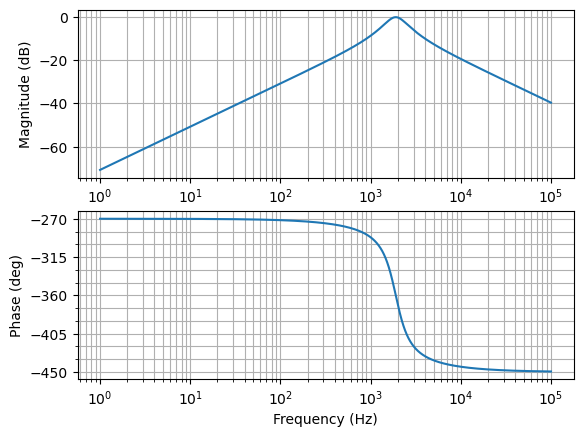

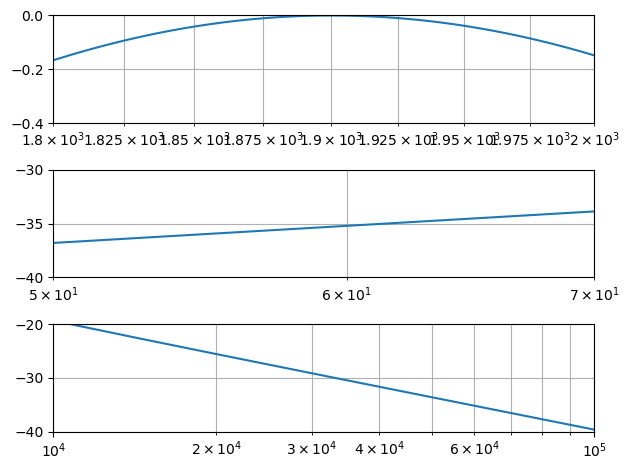

In [74]:
# Insert code for Task 3 here
# There needs to be a Bode plot corresponding to each plot from Task 1

steps = 1
w = np.arange(1, 1e5+steps, steps)
w = w*2*np.pi
R = 50
L = 2.3e-3
C = 3.05e-6

num = np.array([1/(R*C), 0])
den = np.array([1, 1/(R*C), 1/(L*C)])

sys = con.TransferFunction(num,den)

_ = con.bode(sys, w, dB=True, Hz=True, deg=True, plot=True)

plt.figure()
mag, phase, omega = con.bode(sys, w, dB=True, Hz=True, deg=True, plot=False)
omega = omega/(2*np.pi)

#plotting
plt.subplot(3, 1, 1)
plt.semilogx(omega, 20*np.log10(mag))
plt.xlim(1.8e3, 2e3)
plt.ylim(-0.4, 0)
plt.grid(which="both")

plt.subplot(3, 1, 2)
plt.semilogx(omega, 20*np.log10(mag))
plt.xlim(50, 70)
plt.ylim(-40, -30)
plt.grid(which="both")

plt.subplot(3, 1, 3)
plt.semilogx(omega, 20*np.log10(mag))
plt.xlim(1e4, 1e5)
plt.ylim(-40, -20)
plt.grid(which="both")

plt.tight_layout()
plt.show()

4. Using Python, filter the noisy sensor signal using the filter you designed and demonstrate that the output signal (which is now filtered) has been correctly attenuated at the appropriate frequencies. In other words, show that the filter specifications in **Task 2** have been met by plotting and analyzing the filtered output signal.

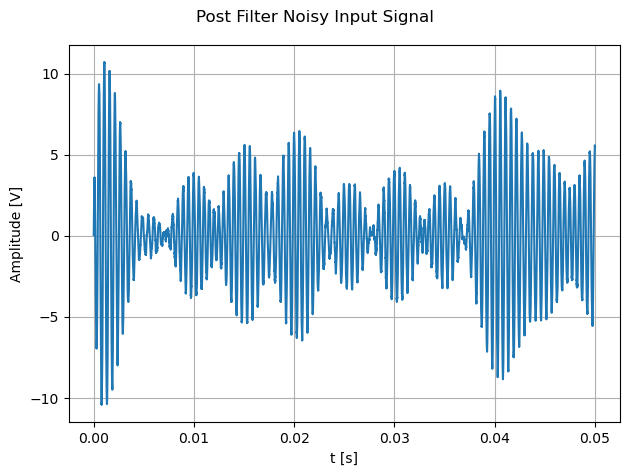

In [59]:
# Insert code for Task 4 here
# For the comparison plots, plot the original signal and the filtered signal as different traces in the same plot
# you will need to change the linestyle and color of one of these traces when you use the make_stem() function

steps = 1e-6

num = np.array([1/(R*C), 0])
den = np.array([1, 1/(R*C), 1/(L*C)])

zNum, zDen = sig.bilinear(num, den, 1/steps)
postFilter = sig.lfilter(zNum, zDen, sensor_sig)

freqPost, magPost, phasePost = FastFourierTransform(postFilter, 1/steps)

plt.figure()
plt.plot(t, postFilter)
plt.grid()
plt.suptitle("Post Filter Noisy Input Signal")
plt.xlabel("t [s]")
plt.ylabel("Amplitude [V]")
plt.tight_layout()
plt.show()

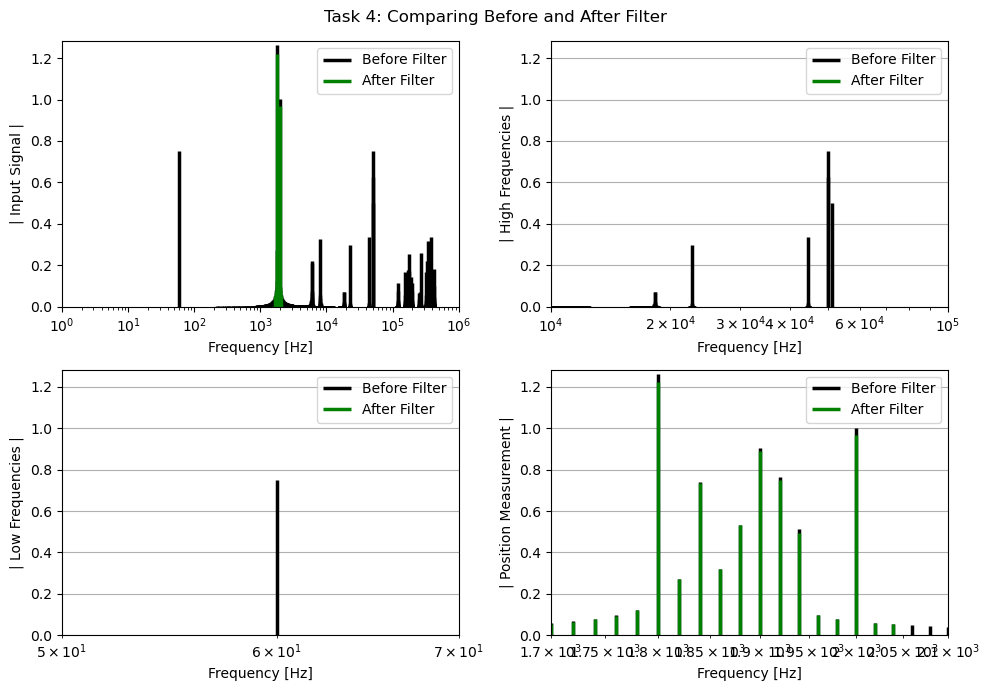

In [66]:
sampleFreq = 1 / steps
#FFT
freq, mag, phi = FastFourierTransform(sensor_sig, sampleFreq)
freqPost, magPost, phasePost = FastFourierTransform(postFilter, 1/steps)

for i in range(len(magPost)):
    if magPost[i] > 0.05: magPost[i] = magPost[i]
    else: magPost[i] = 0

#plotting
plt.figure(tight_layout=True, figsize=(10, 7))
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

#plot into subplot
make_stem(ax1, freq, mag, label="Before Filter")
ax1.set_xlabel("Frequency [Hz]")
ax1.set_xlim([1, 1e6])
ax1.set_xscale("log")
ax1.set_ylabel("| Input Signal |")
make_stem(ax1, freq, magPost, color="g", label="After Filter")
ax1.legend(loc="upper right")

make_stem(ax2, freq, mag, label="Before Filter")
ax2.set_xlabel("Frequency [Hz]")
ax2.set_xlim([1e4, 1e5])
ax2.set_xscale("log")
ax2.set_ylabel("| High Frequencies |")
make_stem(ax2, freq, magPost, color="g", label="After Filter")
ax2.legend()
ax2.grid()

make_stem(ax3, freq, mag, label="Before Filter")
ax3.set_xlabel("Frequency [Hz]")
ax3.set_xlim([50,70])
ax3.set_xscale("log")
ax3.set_ylabel("| Low Frequencies |")
make_stem(ax3, freq, magPost, color="g", label="After Filter")
ax3.legend()
ax3.grid()

make_stem(ax4, freq, mag, label="Before Filter")
ax4.set_xlabel("Frequency [Hz]")
ax4.set_xlim([1.7e3, 2.1e3])
ax4.set_xscale("log")
ax4.set_ylabel("| Position Measurement |")
make_stem(ax4, freq, magPost, color="g", label="After Filter")
ax4.legend()
ax4.grid()

plt.suptitle("Task 4: Comparing Before and After Filter")
plt.show()

### 5. Questions
1. Earlier this semester, you were asked what you personally wanted to get out of taking this course. Do you feel like that personal goal was met? Why or why not?
>I feel that I met my personal goal for the semester. My understanding of Python grew exponentially. This prompted me to sign up for the CS course Python for Machine Learning into my tech electives in the next year. 
2. Please fill out the course feedback survey, I will read every word and very much appreciate the feedback.
3. Good luck in the rest of your education and career!